## NeXLParticle

This example shows how to use NeXLParticle and the 'Zeppelin' struct to load Zeppelin particle data sets and access the tabular, image and spectral data.

In [1]:
using Revise
using NeXLParticle
using NeXLSpectrum
using Gadfly
using DataFrames
using Images

┌ Info: Precompiling NeXLParticle [9f92fee6-ed62-42c3-b009-0e4f934456c2]
└ @ Base loading.jl:1273
┌ Info: Loading DataFrames support into Gadfly.jl
└ @ Gadfly C:\Users\nritchie\.julia\packages\Gadfly\09PWZ\src\mapping.jl:228
┌ Info: Loading NeXLSpectrum Gadfly support
└ @ NeXLSpectrum C:\Users\nritchie\.julia\dev\NeXLSpectrum\src\gadflysupport.jl:338


In [15]:
zep=Zeppelin("Zeppelin\\test.hdz")

Zeppelin[Zeppelin\test.hdz,(250, 98)]

In [16]:
ENV["columns"]=240
zep.data[1:10, [:NUMBER, :DAVG, :CLASSNAME, :FIRSTELM, :FIRSTPCT, :SECONDELM, :SECONDPCT, :THIRDELM, :THIRDPCT, :FOURTHELM, :FOURTHPCT ]]

,NUMBER,DAVG,CLASSNAME,FIRSTELM,FIRSTPCT,SECONDELM,SECONDPCT,THIRDELM,THIRDPCT,FOURTHELM,FOURTHPCT
,Int64,Float64,Categorical…,Int64,Float64,Int64,Float64,Int64,Float64,Int64,Float64
1,1,1.83843,Iron-80,26,89.7652,8,39.3747,16,5.07137,14,2.1913
2,2,2.98486,Iron-60,8,74.331,26,60.0366,16,27.0303,15,8.96148
3,3,3.26079,Iron-90,26,95.6806,8,35.7823,16,3.39061,17,0.479296
4,4,3.50613,Calcite,20,89.9618,8,33.4914,14,5.39432,19,1.38043
5,5,2.39501,Iron-90,26,96.5634,8,36.367,16,1.70483,14,1.40178
6,6,3.59721,Iron-90,26,94.2262,8,36.4597,14,3.21033,16,1.34868
7,7,2.73491,Iron-60,26,65.0184,8,35.9561,56,12.6194,16,7.09004
8,8,1.20893,Iron-80,26,83.6919,8,37.1902,16,6.01653,30,3.89939
9,9,2.75471,Ba+S,8,71.3241,56,41.7317,16,30.5127,26,22.0047


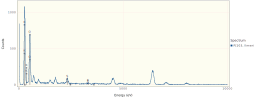

In [17]:
set_default_plot_size(10inch,4inch)
s=zep[103]
imgs = s[:Image]
plot(s,xmax=1.0e4, autoklms=true)

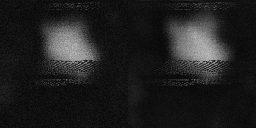

In [18]:
[imgs[:,:,1] imgs[:,:,2]]

In [19]:
s[:StagePosition]

Dict{Symbol,Float64} with 5 entries:
  :Z => 2.50081
  :T => -0.0
  :R => -0.0
  :X => -1.38824
  :Y => 0.81837

In [25]:
elms = ( n"Ag", n"Al", n"Ba", n"Bi", n"Br", n"C", n"Ca", n"Ce", n"Cl", n"Co", n"Cr", n"Cu", n"F", n"Fe", n"K", n"Mg", n"Mn", n"Na", n"Nd", n"Ni", 
    n"O", n"P", n"Pb", n"S", n"Sb", n"Si", n"Sn", n"Sr", n"Ti", n"V", n"W", n"Zn", n"Zr" )
refs = Dict{Element,Spectrum}( elm => readEMSA("Zeppelin\\Standards\\$(elm.symbol) std.msa") for elm in elms);

In [26]:
det = matching(refs[n"Fe"],132.0)

EDS[4096 channels, E[ch] = 1.63032 + 9.99856⋅ch, 132.0 eV @ Mn Kα]

In [40]:
@time res=NeXLParticle.quantify(zep, det, refs);

 26.744849 seconds (51.61 M allocations: 5.346 GiB, 1.97% gc time)


In [44]:
ENV["columns"]=500
res[1:20,1:40]

,FIRSTELM,FIRSTPCT,SECONDELM,SECONDPCT,THIRDELM,THIRDPCT,FOURTHELM,FOURTHPCT,O,U[O],F,U[F],NA,U[Na],MG,U[Mg],AL,U[Al],SI,U[Si],P,U[P],S,U[S],CL,U[Cl],K,U[K],CA,U[Ca],TI,U[Ti],V,U[V],CR,U[Cr],MN,U[Mn],FE,U[Fe]
,Element⍰,Float64,Element⍰,Float64,Element⍰,Float64,Element⍰,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,Element(Iron),82.9295,Element(Sulfur),4.78067,Element(Bismuth),2.12227,Element(Silicon),1.92832,38.3708,0.181902,0.975721,0.178683,0.0,2.02411,0.859469,0.0423223,0.372974,0.0378765,1.92832,0.0570791,0.0,1.8875,4.78067,0.0706388,0.271897,0.0413527,0.41009,0.0427783,0.234213,0.0506145,0.0,3.89802,0.0,8.2394,0.265607,0.0533804,0.0,5.49173,82.9295,0.280111
2,Element(Iron),34.6054,Element(Sulfur),15.8415,Element(Bismuth),10.3393,Element(Bromine),5.56603,63.1346,0.378885,0.0,9.0944,0.0,8.5559,0.0,0.161876,0.622648,0.145347,0.0,16.4786,5.24388,0.268073,15.8415,0.302567,1.04749,0.173508,1.6103,0.23767,0.734658,0.20389,2.5842,0.251392,1.27465,0.206231,0.0,40.071,0.0,22.2447,34.6054,0.437657
3,Element(Iron),74.6293,Element(Strontium),9.46041,Element(Sulfur),2.68597,Element(Lead),1.68498,29.4216,0.187682,0.0,2.86999,0.0,0.0542216,0.138213,0.0419366,0.232788,0.0405236,1.01992,0.0526585,0.0,2.13108,2.68597,0.0615756,0.3892,0.0466989,0.208935,0.066235,0.680274,0.0678758,0.0,0.0743773,0.0,9.49566,0.559509,0.0613149,0.0,6.32464,74.6293,0.289876
4,Element(Calcium),71.8702,Element(Antimony),8.94094,Element(Silicon),4.08132,Element(Bromine),2.58564,28.8439,0.141551,0.0,1.43704,0.0,1.44011,0.276269,0.0313395,0.0,0.150651,4.08132,0.0467632,0.0,0.0358734,0.978048,0.035767,0.480726,0.0328989,1.56259,0.0584989,71.8702,0.169937,0.0,3.2737,0.0,0.0356905,0.0,3.23258,0.0,3.13493,0.644408,0.0521812
5,Element(Iron),84.6388,Element(Strontium),4.43085,Element(Lead),2.0285,Element(Sulfur),1.69452,34.2008,0.18102,0.0,2.74727,0.0,0.050117,0.250996,0.0384713,0.0,0.160818,1.2003,0.0520356,0.301406,0.0451951,1.69452,0.0562664,0.223943,0.0431,0.0,2.45198,0.565398,0.0489769,0.0,4.86855,0.0,4.3463,0.0,9.82308,0.842389,0.0799694,84.6388,0.289342
6,Element(Iron),90.2352,Element(Silicon),2.97641,Element(Bromine),1.94571,Element(Sulfur),1.41728,35.9201,0.142883,0.0,1.86923,0.165866,0.0334293,0.186364,0.02592,0.580433,0.0270393,2.97641,0.041505,0.152141,0.0315897,1.41728,0.0407451,0.409416,0.0336662,0.0,1.61538,0.161661,0.0329606,0.0,3.26399,0.0,5.91919,0.0,6.57883,0.259718,0.0449841,90.2352,0.234213
7,Element(Iron),59.1402,Element(Barium),11.5479,Element(Sulfur),6.47623,Element(Calcium),5.78233,35.6236,0.160415,0.0,2.20802,0.165794,0.0348169,0.967407,0.0378422,0.55169,0.158352,5.74983,0.0569355,0.24148,0.0398664,6.47623,0.067587,0.254573,0.0364827,0.567316,0.0521695,5.78233,0.0727527,0.0,4.799,0.0,7.98798,0.0,8.38426,0.0,4.8264,59.1402,0.215295
8,Element(Iron),76.2781,Element(Sulfur),5.68099,Element(Copper),3.25762,Element(Zinc),2.8467,36.0986,0.198319,0.0,3.02508,0.0,2.43862,0.709878,0.049278,0.485388,0.0427389,1.88836,0.0549425,0.0,0.0647094,5.68099,0.0880989,0.0,0.0486733,0.590377,0.0538539,0.0,3.72978,0.351751,0.0837994,0.474379,0.062291,0.0,5.59739,1.10334,0.0746803,76.2781,0.297063
9,Element(Barium),29.6075,Element(Sulfur),21.5369,Element(Iron),14.83,Element(Bromine),13.9281,64.1665,0.404731,0.0,10.0731,0.0,10.2268,0.0,0.187546,0.0,0.782569,1.70879,0.197194,0.0,9.29679,21.5369,0.33799,0.0,0.201057,2.88068,0.270214,3.78645,0.276946,0.0,25.6778,0.0,21.8969,0.0,45.4012,0.871222,0.250396,14.83,0.385145


In [48]:
describe(res[:,9:2:end])

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Float64,Float64,Float64,Float64,Nothing,Nothing,DataType
1,O,38.6421,12.3778,38.0021,81.4852,,,Float64
2,F,0.0441774,0.0,0.0,5.23813,,,Float64
3,NA,0.424921,0.0,0.175748,11.0216,,,Float64
4,MG,1.92494,0.0,0.435063,44.6242,,,Float64
5,AL,4.51212,0.0,0.827327,96.9823,,,Float64
6,SI,13.1008,0.0,2.91574,92.9866,,,Float64
7,P,0.342584,0.0,0.0,12.8707,,,Float64
8,S,5.11643,0.149071,3.01692,39.9711,,,Float64
9,CL,0.305743,0.0,0.0,6.14567,,,Float64


Things to add
  - Plot multiple rows from a zep
  - Add image scales
  - Add multi-images to left of plot
  - Row filters
  - Columns sorting